## (a) Implementation


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [2]:
class KMeans:
    def __init__(self, k=3, min_iter=30):
        self.k = k
        self.min_iter = min_iter
        self.X = None
        self.labels = None
        self.clusters = {i: [] for i in range(k)}
        self.centroids = {}

    def update_centroid(self):
        for label, data in self.clusters.items():
            # if len(data) == 0:
            #     # Reinitialize centroid of empty cluster
            #     self.centroids[label] = np.random.uniform(10, 999999, size=3)
            # else:
            self.centroids[label] = np.mean(data, axis=0)

    def assign(self):
        distances = np.zeros((self.X.shape[0], self.k))
        for label, centroid in self.centroids.items():
            distances[:, label] = np.linalg.norm(self.X - centroid, axis=1)
        self.labels = np.argmin(distances, axis=1)
        self.clusters = {i: [] for i in range(self.k)}
        for i, label in enumerate(self.labels):
            self.clusters[label].append(self.X[i])

    def fit(self, X):
        # initial
        self.X = X
        indices = np.random.permutation(X.shape[0])
        parts = np.array_split(indices, self.k)
        for i in range(self.k):
            self.clusters[i] = X[parts[i]]

        # iteration update
        counter = 0
        prev = None
        while prev != self.centroids or counter < self.min_iter:
            self.update_centroid()
            # print(self.centroids)
            # print()
            self.assign()
            prev = self.centroids
            counter += 1

    def predict(self, x):
        distances = np.zeros((self.X.shape[0], self.k))
        for label, centroid in self.centroids.items():
            distances[:, label] = np.linalg.norm(self.X - centroid, axis=1)
        return distances

### Test model with simple data


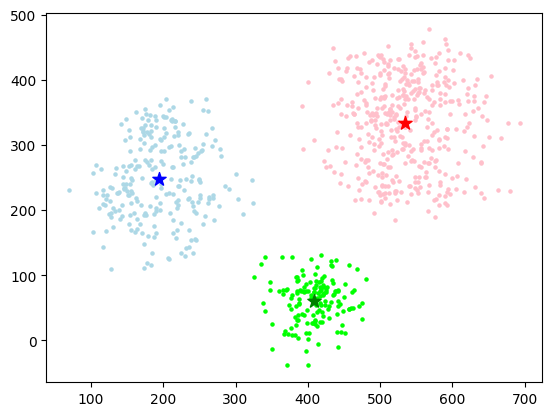

In [3]:
df = pd.read_csv("./data/cluster.csv")

model = KMeans(3)
model.fit(df[["x1", "x2"]].values)

for label, points in model.clusters.items():
    x = [p[0] for p in points]
    y = [p[1] for p in points]

    centroids_x, centroids_y = model.centroids[label]

    plt.scatter(x, y, c={0: "lightblue", 1: "pink", 2: "lime"}[label], s=5)
    plt.scatter(
        centroids_x, centroids_y, marker="*", c={0: "b", 1: "r", 2: "g"}[label], s=100
    )


plt.show()

### Compress picture


(16384, 3)


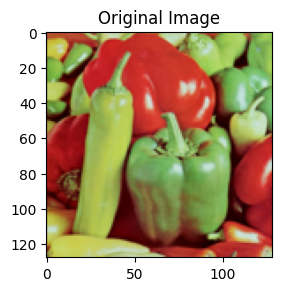

In [5]:
def compress(path="./data/peppers-small.tiff"):
    A = imread(path)
    plt.subplot(1, 2, 1)
    plt.imshow(A)
    plt.title("Original Image")

    r = A[:, :, 0]
    g = A[:, :, 1]
    b = A[:, :, 2]

    image = np.dstack((r, g, b))
    height, width, dim = image.shape
    X = image.reshape(height * width, dim)

    # print(X.shape)

    model = KMeans(16)
    model.fit(X)

    new_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            new_image[i,j] = 

    # plt.subplot(1, 2, 2)
    # plt.imshow(new_image)
    # plt.title("Compressed Image")
    # plt.show()


compress()

---

## (b)
